In [79]:
# Import the libraries and packages
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import pylab
from pylab import rcParams

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.mosaicplot import mosaic
import statistics
from scipy import stats

import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

from scipy.stats import chisquare
from scipy.stats import chi2_contingency

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, make_scorer
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.tree import DecisionTreeRegressor as dtr

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingRegressor

SEED=42

from IPython.core.interactiveshell import InteractiveShell # Importing so we can run multiple lines in one cell
InteractiveShell.ast_node_interactivity = "all" # Code so multiple lines in one cell can be ran simultaenously 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
import textwrap
warnings.filterwarnings('ignore')

# Import the dataset CSV
df = pd.read_csv('medical_clean.csv', index_col=0)

# Check the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [80]:
# Rename columns to give proper naming to predictors
df.rename(columns={'Item1':'Timely_admis','Item2':'Timely_treat',
 'Item3':'Timely_visits','Item4':'Reliability',
 'Item5':'Options','Item6':'Hrs_treat',
 'Item7':'Courteous','Item8':'Active_listen'},inplace=True)
df.head()
df.info()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [81]:
# Checking that the variables got renamed correctly
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Timely_admis,Timely_treat,Timely_visits,Reliability,Options,Hrs_treat,Courteous,Active_listen
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [82]:
# Dropping irrelevant variables for decision tree such as demographic data, variables with more than 3 levels of cardinality
df.drop(['Customer_id','Interaction', 'UID', 'City', 'State',
        'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job', 
        'Children','ReAdmis', 'Full_meals_eaten','vitD_supp', 'Soft_drink',
        'Additional_charges', 'Timely_admis', 'Timely_treat', 'Timely_visits', 'Reliability', 'Options',
        'Hrs_treat', 'Courteous', 'Active_listen'], axis=1, inplace=True) 

In [83]:
# Reviewing the new data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Income              10000 non-null  float64
 3   Marital             10000 non-null  object 
 4   Gender              10000 non-null  object 
 5   VitD_levels         10000 non-null  float64
 6   Doc_visits          10000 non-null  int64  
 7   Initial_admin       10000 non-null  object 
 8   HighBlood           10000 non-null  object 
 9   Stroke              10000 non-null  object 
 10  Complication_risk   10000 non-null  object 
 11  Overweight          10000 non-null  object 
 12  Arthritis           10000 non-null  object 
 13  Diabetes            10000 non-null  object 
 14  Hyperlipidemia      10000 non-null  object 
 15  BackPain            10000 non-null  object 
 16  Anxiety  

In [84]:
df.shape

(10000, 23)

In [85]:
# Checking for null values
df.isna().any()
df.isnull().sum()

Area                  False
Age                   False
Income                False
Marital               False
Gender                False
VitD_levels           False
Doc_visits            False
Initial_admin         False
HighBlood             False
Stroke                False
Complication_risk     False
Overweight            False
Arthritis             False
Diabetes              False
Hyperlipidemia        False
BackPain              False
Anxiety               False
Allergic_rhinitis     False
Reflux_esophagitis    False
Asthma                False
Services              False
Initial_days          False
TotalCharge           False
dtype: bool

Area                  0
Age                   0
Income                0
Marital               0
Gender                0
VitD_levels           0
Doc_visits            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
dtype: int64

In [86]:
# Checking for duplicates
df.duplicated().value_counts()

False    10000
Name: count, dtype: int64

In [87]:
# finding the count of unique values in each column - to determine levels of cardinality
df.nunique()

Area                     3
Age                     72
Income                9993
Marital                  5
Gender                   3
VitD_levels           9976
Doc_visits               9
Initial_admin            3
HighBlood                2
Stroke                   2
Complication_risk        3
Overweight               2
Arthritis                2
Diabetes                 2
Hyperlipidemia           2
BackPain                 2
Anxiety                  2
Allergic_rhinitis        2
Reflux_esophagitis       2
Asthma                   2
Services                 4
Initial_days          9997
TotalCharge           9997
dtype: int64

In [88]:
# Checking data types of the variables - the objects/categorical variables need to be encoded to numerical data
df.dtypes

Area                   object
Age                     int64
Income                float64
Marital                object
Gender                 object
VitD_levels           float64
Doc_visits              int64
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight             object
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety                object
Allergic_rhinitis      object
Reflux_esophagitis     object
Asthma                 object
Services               object
Initial_days          float64
TotalCharge           float64
dtype: object

In [89]:
# Convert categorical variables to numerical format using one-hot encoding where appropriate
binary_columns = ['HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']

# For binary columns, map 'Yes/No' to 1/0
for column in binary_columns:
    df[column] = df[column].map({'Yes': 1, 'No': 0})

In [90]:
multi_category_columns = ['Gender', 'Area', 'Initial_admin', 'Marital', 'Services']

# For multi-category columns, use one-hot encoding. Drop_first is false because multicollinearity isn't an issue for decision trees (Bruce 2020).
df = pd.get_dummies(data=df, columns=multi_category_columns, drop_first=False)

# Convert only the one-hot encoded columns to integers
one_hot_columns = [col for col in df.columns if any (prefix in col for prefix in multi_category_columns)]
for col in one_hot_columns:
    df[col] = df[col].astype(int)

In [91]:
# Using Ordinal Encoding for ordinal variables
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()
complication_encoded = enc.fit_transform(df[['Complication_risk']])
df['Complication_risk'] = complication_encoded

In [92]:
# Checking data types to see if encoding worked
df.dtypes

Age                                      int64
Income                                 float64
VitD_levels                            float64
Doc_visits                               int64
HighBlood                                int64
Stroke                                   int64
Complication_risk                      float64
Overweight                               int64
Arthritis                                int64
Diabetes                                 int64
Hyperlipidemia                           int64
BackPain                                 int64
Anxiety                                  int64
Allergic_rhinitis                        int64
Reflux_esophagitis                       int64
Asthma                                   int64
Initial_days                           float64
TotalCharge                            float64
Gender_Female                            int64
Gender_Male                              int64
Gender_Nonbinary                         int64
Area_Rural   

In [93]:
# Summary statistics of the data frame after cleaning data
df.describe()

,Age,Income,VitD_levels,Doc_visits,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,TotalCharge,Gender_Female,Gender_Male,Gender_Nonbinary,Area_Rural,Area_Suburban,Area_Urban,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Marital_Divorced,Marital_Married,Marital_Never Married,Marital_Separated,Marital_Widowed,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,40490.495160,17.964262,5.012200,0.409000,0.199300,1.115900,0.709400,0.357400,0.27380,0.337200,0.411400,0.321500,0.394100,0.413500,0.28930,34.455299,5312.172769,0.501800,0.476800,0.021400,0.336900,0.332800,0.330300,0.250400,0.506000,0.243600,0.196100,0.202300,0.198400,0.198700,0.204500,0.526500,0.122500,0.313000,0.038000
std,20.638538,28521.153293,2.017231,1.045734,0.491674,0.399494,0.879855,0.454062,0.479258,0.44593,0.472777,0.492112,0.467076,0.488681,0.492486,0.45346,26.309341,2180.393838,0.500022,0.499486,0.144721,0.472674,0.471239,0.470345,0.433265,0.499989,0.429276,0.397065,0.401735,0.398815,0.399042,0.403356,0.499322,0.327879,0.463738,0.191206
min,18.000000,154.080000,9.806483,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.001981,1938.312067,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,19598.775000,16.626439,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,7.896215,3179.374015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,33768.420000,17.951122,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,35.836244,5213.952000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,71.000000,54296.402500,19.347963,6.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,61.161020,7459.699750,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,89.000000,207249.100000,26.394449,9.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,71.981490,9180.728000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
# Feature Selection to discover the best independent variables to use in the model
X = df.drop('HighBlood', axis=1)
y = df['HighBlood']
feature_names = X.columns

# Initialize the class and call fit_transform
skbest = SelectKBest(f_classif, k='all') # k = features
X_new = skbest.fit_transform(X, y)
X_new.shape

# Finding p-values to select statistically significant features
p_values = pd.DataFrame({'Feature':X.columns, 'p_value':skbest.pvalues_}).sort_values('p_value')
p_values[p_values['p_value']<0.05]

# Features to keep defined
features_to_keep = p_values['Feature'][p_values['p_value']<.05] 

# Print the name of the selected features
print(features_to_keep)

(10000, 35)

,Feature,p_value
6,Overweight,0.008711
27,Marital_Married,0.015962
16,TotalCharge,0.046489


6          Overweight
27    Marital_Married
16        TotalCharge
Name: Feature, dtype: object


In [95]:
selected_features_columns = list(df[features_to_keep])
print(selected_features_columns)

feature_select_medical_data = df[selected_features_columns]

feature_select_medical_data = feature_select_medical_data.applymap(lambda x: int(x) if isinstance(x, bool) else x)
feature_select_medical_data.to_csv('./feature-selected-medical-data.csv')

['Overweight', 'Marital_Married', 'TotalCharge']


In [96]:
X_new = sm.add_constant(X[selected_features_columns])
y_new = y

print(X_new.shape)
print(y_new.shape)

# Exporting cleaned dataset
cleaned_dataset = df.to_csv('cleaned_dataset_task_2.csv', index = False)

(10000, 4)
(10000,)


Splitting your dataset is essential for an unbiased evaluation of prediction performance. In most cases, it’s enough to split your dataset randomly into three subsets:

The training set is applied to train or fit your model. For example, you use the training set to find the optimal weights, or coefficients, for linear regression, logistic regression, or neural networks.

The validation set is used for unbiased model evaluation during hyperparameter tuning. For example, when you want to find the optimal number of neurons in a neural network or the best kernel for a support vector machine, you experiment with different values. For each considered setting of hyperparameters, you fit the model with the training set and assess its performance with the validation set.

The test set is needed for an unbiased evaluation of the final model. You shouldn’t use it for fitting or validation.

In less complex cases, when you don’t have to tune hyperparameters, it’s okay to work with only the training and test sets (Stojilikovic 2024).

In [97]:
# Splitting data into train and test sets. 80/20 rule is implemented for test size. Stratify = y for classes.
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.20, random_state=42, stratify=y)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(8000, 4)
(2000, 4)
(8000,)
(2000,)


In [98]:
# Exporting train and test data to CSV. Model is trained on training data and tested on testing data (hold out validation).
X_train.to_csv('./x_train_dataset_task_2.csv')
X_test.to_csv('./x_test_dataset_task_2.csv')

y_train.to_csv('./y_train_dataset_task_2.csv')
y_test.to_csv('./y_test_dataset_task_2.csv')

In [99]:
# Hyper Parameter Tuning for Decision Tree and Estimator
# The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.
dt_parameters = {
    'min_samples_leaf': np.arange(.04, .24, .02),
    'max_depth': np.arange(1, 101, 1)
}
#print(f'Parameter Grid: {dt_parameters}')

decision_tree_estimator = dtc(random_state=SEED)

#n_jobs controls the amount of parallel processing that can be done. Setting this to -1 means ALL available CPU cores will be used.
cross_validation_dtc = GridSearchCV(estimator=decision_tree_estimator,
                                   param_grid= dt_parameters,
                                   scoring='roc_auc',
                                   cv=5,
                                   n_jobs=-1)

cross_validation_dtc.fit(X_train, y_train)

#Get best estimator
best_estimator = cross_validation_dtc.best_estimator_

#Check Best Estimator Test Accuracy Score
# Return the mean accuracy on the given test data and labels.
# In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.
best_estimator_test_accuracy = best_estimator.score(X_test, y_test)
print(f'Best Estimator Test Accuracy Score: {best_estimator_test_accuracy}')

#Get predictions for explanatory test data
original_y_target_predictions = best_estimator.predict(X_test)

accuracy_report = accuracy_score(y_test, original_y_target_predictions)
print(f'Best Decision Tree Accuracy Report Score: {accuracy_report}')

original_y_prediction_probabilities = best_estimator.predict_proba(X_test)[:,1]

#compute Receiver Operating Characteristic (ROC) and Area Under the Curve (AUC)
original_roc_auc = roc_auc_score(y_test, original_y_prediction_probabilities)
print(f'ROC AUC Score: {original_roc_auc}')

best_estimator_parameters = best_estimator.get_params()
max_depth = best_estimator_parameters['max_depth']
min_samples_leaf = best_estimator_parameters['min_samples_leaf']

print(f'Calculated max_depth: [{max_depth}]')
print(f'Calculated min_sample_leaf: [{min_samples_leaf}]')
#print(best_estimator)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100]),
                         'min_samples_leaf': array([0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22])},
             scoring='roc_auc')

Best Estimator Test Accuracy Score: 0.591
Best Decision Tree Accuracy Report Score: 0.591
ROC AUC Score: 0.5332855505773233
Calculated max_depth: [3]
Calculated min_sample_leaf: [0.12]


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                                           min_samples_leaf=0.12,
                                                                           random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4]),
                         'n_estimators': array([100, 150, 200, 250, 300])},
             scoring='roc_auc')

GBT best n_estimators: [100]
GBT best learning_rate: [0.9]


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    min_samples_leaf=0.12,
                                                    random_state=42),
                   learning_rate=0.9, n_estimators=100, random_state=42)

Ada boosted Decision Tree Model Accuracy: [0.5845]
|                        | Predicted: No HighBlood | Predicted: HighBlood |
|------------------------|---------------------------|------------------------|
| Actual: No HighBlood |           1108            |           74           |
| Actual: HighBlood      |            757            |           61           |
|------------------------|---------------------------|------------------------|
Mean Squared Error: 0.4155

Rooted Mean Squared Error: 0.6445928947793328

              precision    recall  f1-score   support

           0       0.59      0.94      0.73      1182
           1       0.45      0.07      0.13       818

    accuracy                           0.58      2000
   macro avg       0.52      0.51      0.43      2000
weighted avg       0.54      0.58      0.48      2000
 

AUC (Area Under the Curve) Score: 0.5334546518891771


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

Text(0.5, 1.0, 'Decision Tree (Ada Boost) ROC Curve')

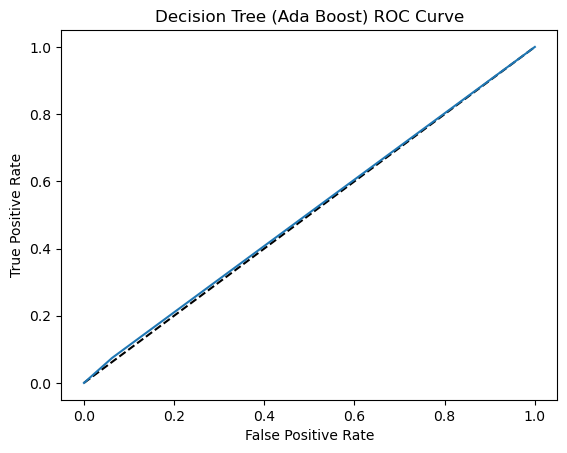

In [100]:
#Hyperparameter tuning for the Gradient Boosting Regressor
# Learning rate is the shrinkage factor between 0 and 1 applied to alpha in the boosting algorithm. 
ada_parameters = {
    'n_estimators': np.arange(100, 301, 50),
    'learning_rate': np.arange(.1, 1.5, .1)
}

tuned_decision_tree = dtc(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=SEED)
original_gradient_boosting_regressor = AdaBoostClassifier(estimator=tuned_decision_tree, random_state=SEED)

#n_jobs controls the amount of parallel processing, and -1 uses ALL available CPU cores to process.
cross_validation_ada = GridSearchCV(estimator=original_gradient_boosting_regressor,
                                    param_grid=ada_parameters,
                                    scoring='roc_auc',
                                    cv=5,
                                    n_jobs=-1)

cross_validation_ada.fit(X_train, y_train)
n_estimators = cross_validation_ada.best_params_['n_estimators']
learning_rate = cross_validation_ada.best_params_['learning_rate']

# N_estimators is the number of boosting rounds
print(f'GBT best n_estimators: [{n_estimators}]')
print(f'GBT best learning_rate: [{learning_rate}]')

tuned_ada_booster = AdaBoostClassifier(estimator=tuned_decision_tree, n_estimators=n_estimators, 
                                       learning_rate=learning_rate, random_state=SEED)
tuned_ada_booster.fit(X_train, y_train)

tuned_y_target_predictions = tuned_ada_booster.predict(X_test)

#Evaluate the results
tuned_ada_boosted_accuracy_score = accuracy_score(y_test, tuned_y_target_predictions)
print(f'Ada boosted Decision Tree Model Accuracy: [{tuned_ada_boosted_accuracy_score}]')

#Calculate the probabilities of getting a positive class
tuned_ada_boosted_y_target_prediction_probabilities = tuned_ada_booster.predict_proba(X_test)[:,1]

tuned_ada_roc_auc = roc_auc_score(y_test, tuned_ada_boosted_y_target_prediction_probabilities)

true_negative, false_positive, false_negative, true_positive = confusion_matrix(y_test, 
                                                                                tuned_y_target_predictions).ravel()
mse = MSE(y_test, tuned_y_target_predictions)
r_mse = mse ** .5
c_report = classification_report(y_test, tuned_y_target_predictions)

c_matrix = f'''| {' ':22} | {'Predicted: No HighBlood':^5} | {'Predicted: HighBlood':^5} |\n
        |{'':->24}|{'':->27}|{'':->24}|\n
        | {'Actual: No HighBlood':^5} | {true_negative:^25} | {false_positive:^22} |\n
        | {'Actual: HighBlood':22} | {false_negative:^25} | {true_positive:^22} |\n
        |{'':->24}|{'':->27}|{'':->24}|\n'''

display_confusion_matrix = textwrap.fill(c_matrix, width=80)

print(display_confusion_matrix)
print(f'Mean Squared Error: {mse}\n')
print(f'Rooted Mean Squared Error: {r_mse}\n')
print(c_report, '\n')
print(f'AUC (Area Under the Curve) Score: {tuned_ada_roc_auc}')

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, tuned_y_target_predictions)
plt.plot([0,1], [0,1], 'k--')
plt.plot(false_positive_rate, true_positive_rate, label='Decision Tree (Ada Boost)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree (Ada Boost) ROC Curve')
plt.show()

Identifying hyperparameters is critical to avoid overfitting (Bruce 2020). For this reason, we start by defining the parameters for ‘min_samples_leaf’ and ‘max_depth’. Min_samples_leaf is especially important as this defines the minimum size for terminal nodes (leaves in the tree) (Bruce 2020). The default is 1 for classification and regression in Python (Bruce 2020). The reason the default values are not used in this analysis is because the defaults may lead to overfitting when applied to the decision tree if it contains noisy data (Bruce 2020). When you increase min_samples_leaf, the algorithm will fit smaller trees and is less likely to create spurious predictive rules (Bruce 2020). The parameter max_depth is the maximum depth of a leaf node to the root of the tree with a default value of 3 (Bruce 2020). This gives us another way to control overfitting: deep trees tend to be more complex and may overfit the data (Bruce 2020). 

Cross-validation is used in this analysis to test the effects of setting different values for the hyperparameters (Bruce 2020). Cross-validation randomly splits up the data into K different groups, also called folds (Bruce 2020). For each fold, a model is trained on the data not in the fold and then evaluated on the data in the fold (Bruce 2020). This yields a measure of accuracy of the model on out-of-sample data (Bruce 2020). The best set of hyperparameters is the one given by the model with the lowest overall error as computed by averaging the errors from each of the folds (Bruce 2020).

To optimize hyperparameter tuning, the model was tuned with the AdaBoostClassifier. Boosting is a general technique to fit a sequence of models by giving more weight to the records with large residuals for each successive round (Bruce 2020). Boosting fits a series of models, in which each successive model seeks to minimize the error of the previous model (Bruce 2020). AdaBoost is an early version of boosting that reweights the data based on the residuals (Bruce 2020). 

In [102]:
# Check best score for the top performing model
print("Training score (MSE): ",cross_validation_dtc.best_score_)
print("Training score (RMSE): ",(cross_validation_dtc.best_score_)**(1/2))
y_train_pred = cross_validation_dtc.predict(X_train)
print("Training - R-squared score for the model: ",r2_score(y_train, y_train_pred))

# Check prediction accuracy
y_pred = cross_validation_dtc.predict(X_test) # Perform prediction

print("Testing - Mean squared error for the model: ",MSE(y_test, tuned_y_target_predictions))
print("Testing - Root mean squared error for the model: ",MSE(y_test, tuned_y_target_predictions)**(1/2))
print("Testing - R-squared score for the model: ",r2_score(y_test, tuned_y_target_predictions))

Training score (MSE):  0.5410456748741284
Training score (RMSE):  0.7355580703616326
Training - R-squared score for the model:  -0.6920473773265652
Testing - Mean squared error for the model:  0.4155
Testing - Root mean squared error for the model:  0.6445928947793328
Testing - R-squared score for the model:  -0.7189381058170852


R Squared (R2) - The coefficient of determination.

This metric measures the relationship between the residual sum of squares (RSS) and the total sum of squares (TSS). The RSS is computed as the ground truth minus the predicted ground truth. This metric tells how well a model fits the data. It ranges between 0 and 1. A R-squared between 0.50 to 0.99 is acceptable. Higher the R-squared, the better the model fits the data (Elleh 2024). 

Negative R2 means that the model performed poorly. 

O R2 means that the model explains none of the variability of the response data around its mean (Elleh 2024). 

CV is to combine the measures of prediction performance to get more accurate model estimations. One of the widely used cross-validation methods is k-fold cross-validation. In it, you divide your dataset into k (often five or ten) subsets, or folds, of equal size and then perform the training and test procedures k times. Each time, you use a different fold as the test set and all the remaining folds as the training set. This provides k measures of predictive performance, and you can then analyze their mean and standard deviation (Stojilikovic 2024).

Hyperparameter tuning, also called hyperparameter optimization, is the process of determining the best set of hyperparameters to define your machine learning model. sklearn.model_selection provides you with several options for this purpose, including GridSearchCV (Stojilikovic 2024).

The AUC represents a model's ability to discriminate between positive and negative classes. An area of 1.0 represents a model that made all predictions perfectly. An area of 0.5 represents a model as good as random. AUC is the measure of a classifier's ability to distinguish between classes and is used as a summary of the ROC curve. AUC measures the whole 2-dimensional Area under the ROC as an entire curve from (0,0) to (1,1). (Elleh 2024).

CV is to combine the measures of prediction performance to get more accurate model estimations. One of the widely used cross-validation methods is k-fold cross-validation. In it, you divide your dataset into k (often five or ten) subsets, or folds, of equal size and then perform the training and test procedures k times. Each time, you use a different fold as the test set and all the remaining folds as the training set. This provides k measures of predictive performance, and you can then analyze their mean and standard deviation (Stojilikovic 2024).

Hyperparameter tuning, also called hyperparameter optimization, is the process of determining the best set of hyperparameters to define your machine learning model. sklearn.model_selection provides you with several options for this purpose, including GridSearchCV (Stojilikovic 2024).

Tree-based models (decision trees, random forests, etc.) can handle both categorical and numerical variables, based on the type of problem and approach. In a classification problem where the measures will involve Entropy, Gini Index, and Misclassification Rate, categorical variables can be used. However, in a regression problem where the measures will involve variance, MSE, and MAE, numerical variables are preferable for better accuracy.

Task 2 in e1 asks you to explain the accuracy and the mean squared error (MSE) of your prediction model where you are expected to do MSE, RMSE, R-Squared, or MAE (Elleh 2024). 